# Reinforcers and Punishers by Skill Level on Gameplay

Utilizing data from Kaggle to perform data cleaning, exploratory data analysis, and statistical analysis of in-game reinforces (i.e., wins, etc.) and punishers (i.e., losses, etc.) for a popular video game.

Dataset: https://www.kaggle.com/datasets/aishahakami/call-of-duty-players

In [1]:
#Importing pandas and numpy in order to read dataset and run basic descriptive statistics
#Importing other statistical packages for running more advanced analyses
import pandas as pd
import numpy as np
import statistics as stats
#Improting matplotlib and seaborn to create visuals for EDA and data cleaning
import matplotlib.pyplot as plt
import seaborn as sns

#Reading CSV into jupyter and creating Call of Duty dataframe -- 'cod_df'
cod_df=pd.read_csv('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Git/Final_Project_Data/cod.csv')

Step 1: EDA

In [2]:
#Checking to see if reading CSV looks successful
cod_df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [3]:
#How many rows and columns in this dataframe?
cod_df.shape

(1558, 19)

In [4]:
#Exporing the column names in this dataset
cod_df.columns

Index(['name', 'wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses',
       'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime',
       'gamesPlayed', 'assists', 'misses', 'xp', 'scorePerMinute', 'shots',
       'deaths'],
      dtype='object')

In [5]:
#What are the descriptive statistics (mean, median, mode, range, etc) for the variables in the dataset
cod_df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [6]:
#Checking for percent missing data by column
for col in cod_df.columns:
    pct_missing = np.mean(cod_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#No missing data

name - 0%
wins - 0%
kills - 0%
kdRatio - 0%
killstreak - 0%
level - 0%
losses - 0%
prestige - 0%
hits - 0%
timePlayed - 0%
headshots - 0%
averageTime - 0%
gamesPlayed - 0%
assists - 0%
misses - 0%
xp - 0%
scorePerMinute - 0%
shots - 0%
deaths - 0%


<Axes: >

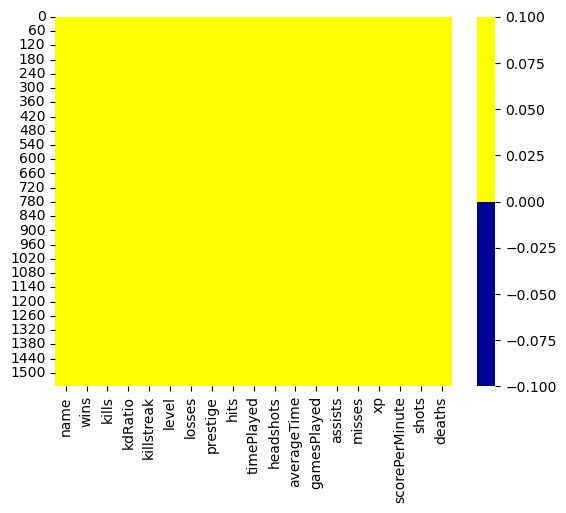

In [7]:
#Checking visually for missing data - I already know there is no missing but showing a way to do this with a visual
cols = cod_df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(cod_df[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: >

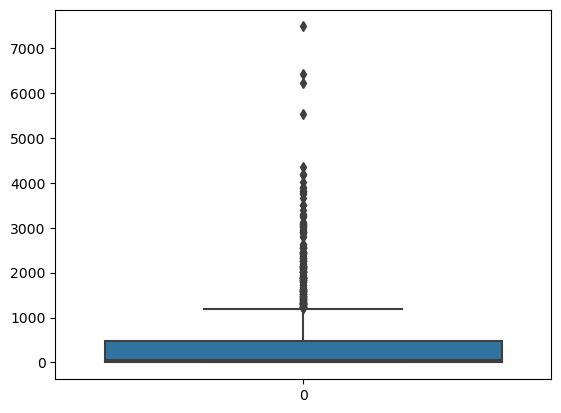

In [8]:
#Checking the distribution of my outcome variables (DV) - 'timePlayed' and 'averageTime'
sns.boxplot(data=cod_df['timePlayed'])

(array([1.261e+03, 1.550e+02, 7.500e+01, 3.600e+01, 1.700e+01, 1.000e+01,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([   0. ,  747.9, 1495.8, 2243.7, 2991.6, 3739.5, 4487.4, 5235.3,
        5983.2, 6731.1, 7479. ]),
 <BarContainer object of 10 artists>)

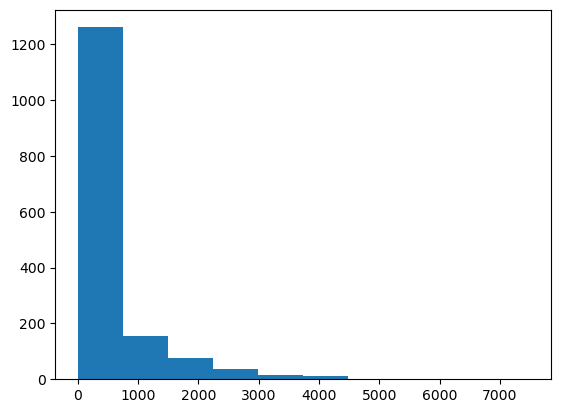

In [9]:
plt.hist(cod_df['timePlayed'])
#timePlayed is skewed and has outliers- some intense players play longer and drive up my mean

<Axes: >

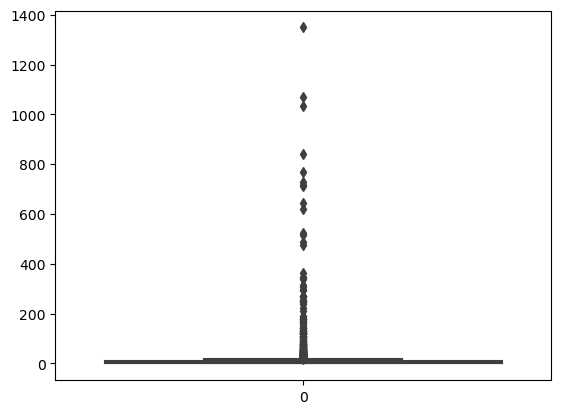

In [10]:
sns.boxplot(data=cod_df['averageTime'])

(array([1.51e+03, 2.50e+01, 9.00e+00, 4.00e+00, 2.00e+00, 4.00e+00,
        1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([   0. ,  134.9,  269.8,  404.7,  539.6,  674.5,  809.4,  944.3,
        1079.2, 1214.1, 1349. ]),
 <BarContainer object of 10 artists>)

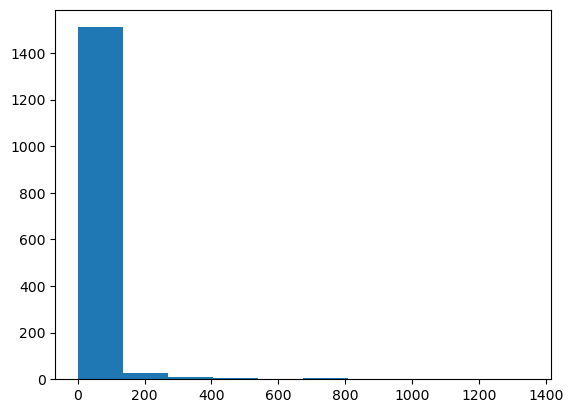

In [11]:
plt.hist(cod_df['averageTime'])
#Similar results for averageTime
#I will be removing outliers and will consider transforming the variables or running non-parametric tests

In [12]:
#I am also interest on how experince level (low, medium, high) impacts time played
#Looking at the distribution of xp so I can use quartiles to categorize XP into low, medium, and high
cod_df['xp'].describe()

count    1.558000e+03
mean     8.726335e+05
std      1.795755e+06
min      0.000000e+00
25%      2.106250e+03
50%      6.396800e+04
75%      8.286690e+05
max      1.497054e+07
Name: xp, dtype: float64

Step 2: Cleaning

1) Missing Data - There is none.

2. Irregular Data

In [13]:
#Addressing the skew for timePlayed
#First create variables for the standard deviations to use in calculations
timePlayed_list = cod_df['timePlayed']
timePlayed_sd = stats.stdev(timePlayed_list)
timePlayed_sd

786.1824985284558

In [14]:
timePlayed_list = cod_df['averageTime']
averageTime_sd = stats.stdev(timePlayed_list)
averageTime_sd

82.63999950291102

In [15]:
#Deleting rows in which timePlayed is above 2 standard devitations from the mean
for index, row in cod_df.iterrows():
    if row['timePlayed'] > (timePlayed_sd*2):
        cod_df.drop(index, inplace=True)
cod_df.shape

(1424, 19)

In [16]:
#Deleting rows in which averageTime is above 2 standard devitations from the mean
for index, row in cod_df.iterrows():
    if row['averageTime'] > (averageTime_sd*2):
        cod_df.drop(index, inplace=True)
cod_df.shape

(1383, 19)

<Axes: >

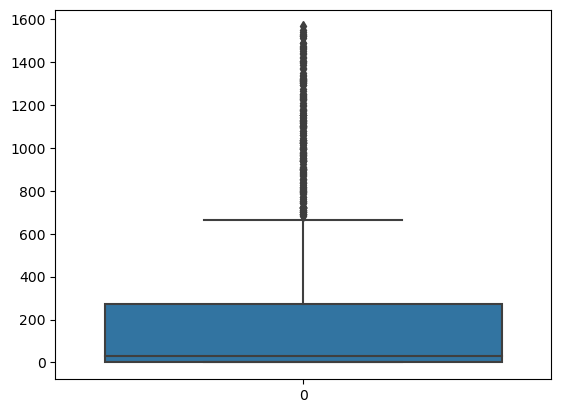

In [17]:
#Visualize the outlier deletion's impact on distribution
sns.boxplot(data=cod_df['timePlayed'])

<Axes: >

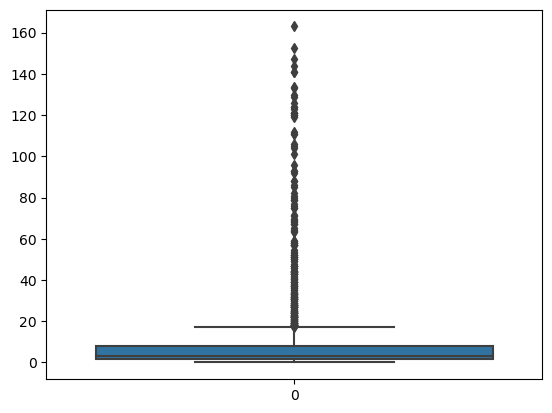

In [18]:
sns.boxplot(data=cod_df['averageTime'])
#Better, but the data is still skewed. May have to consider non-parametric tests or log transformation.

3. Unnecessary Data

In [19]:
#Checking for duplicates
cod_df_dedupped = cod_df.drop('name', axis=1).drop_duplicates()

print(cod_df.shape)
print(cod_df_dedupped.shape)
#There are duplicate rows of information but this may be expected given that different users could have the same data.
#This is true for users who maybe played for very short periods of item and have low or zero scores on all variables.

(1383, 19)
(1167, 18)


In [20]:
#I will keep duplicates given that the usernames are unique.
cod_df['name'].describe()

count                1383
unique               1383
top       RggRt45#4697369
freq                    1
Name: name, dtype: object

In [21]:
#Dropping coloumns for variables that are not relevant to the project 
#(i.e., columns not related to reinforcers, punishers, and times played)
cod_df.drop(['killstreak', 'prestige', 'headshots', 'assists', 'shots'], axis=1)
cod_df.shape

(1383, 19)

In [22]:
#People who have played the game for 0 hours should be considered outliers or deleted because they didn't play at all
cod_df = cod_df[cod_df.averageTime != 0]
cod_df['averageTime'].describe()

count    1173.000000
mean       12.808699
std        23.358939
min         1.000000
25%         2.257669
50%         3.647773
75%        11.000000
max       163.000000
Name: averageTime, dtype: float64

In [23]:
cod_df = cod_df[cod_df.averageTime != 0]
cod_df['timePlayed'].describe()

count    1173.000000
mean      259.913896
std       384.023048
min         1.000000
25%        10.000000
50%        55.000000
75%       375.000000
max      1566.000000
Name: timePlayed, dtype: float64

4. Inconsistent Data - None. Data is numeric except for username.

In [24]:
#Save results of data cleaning to a new csv to use in R and Tableau
from pathlib import Path  
filepath = Path('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Git/Final_Project_Data/cod_clean.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
cod_df.to_csv(filepath)

Step 3: Modeling Data

1) Create new variables for analysis

In [25]:
#Creating a categorical varaible based on quartiles to compare groups between low, medium, and high xp players
def xpGroup(column):
    if column < 3.519000e+04: 
        return 'Low'
    elif column >= 3.519000e+04 and column < 4.383805e+05:
        return 'Medium'
    elif column >= 4.383805e+05:
        return 'High'

cod_df['xpGroup'] = cod_df['xp'].apply(xpGroup)
cod_df['xpGroup'].describe()

count     1173
unique       3
top        Low
freq       481
Name: xpGroup, dtype: object

<Axes: xlabel='xpGroup', ylabel='Count'>

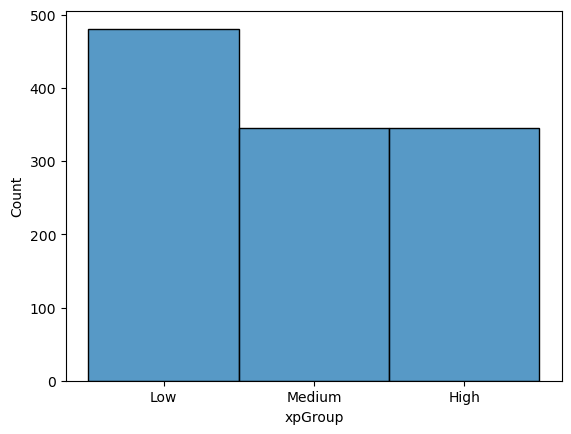

In [26]:
#Look at new variable distribution
sns.histplot(data=cod_df['xpGroup'])

In [27]:
cod_df['xpGroup'].value_counts()

Low       481
Medium    346
High      346
Name: xpGroup, dtype: int64

In [28]:
#Conversting string to numeric and dropping name and unessesary columns so I can use in R
cod_df['xpGroup'] = cod_df['xpGroup'].replace('Low',1)
cod_df['xpGroup'] = cod_df['xpGroup'].replace('Medium',2)
cod_df['xpGroup'] = cod_df['xpGroup'].replace('High',3)
cod_df['xpGroup'].value_counts()

1    481
2    346
3    346
Name: xpGroup, dtype: int64

In [29]:
#Drop string columns for analysis
cod_df= cod_df.drop('name', axis =1)
cod_df.columns

Index(['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige',
       'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed',
       'assists', 'misses', 'xp', 'scorePerMinute', 'shots', 'deaths',
       'xpGroup'],
      dtype='object')

2) Correlations

In [30]:
#Correlation table
cod_df.corr(numeric_only=True)

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,xpGroup
wins,1.000000,0.879906,0.381871,0.560271,0.840246,0.660002,0.292976,0.836766,0.913072,0.861593,-0.182723,0.905579,0.815233,0.865962,0.808528,0.382014,0.865402,0.903087,0.715124
kills,0.879906,1.000000,0.405431,0.568681,0.884240,0.640893,0.256463,0.948083,0.857010,0.975842,-0.178338,0.924439,0.938550,0.938349,0.889905,0.389510,0.945787,0.982407,0.653547
kdRatio,0.381871,0.405431,1.000000,0.523962,0.478513,0.470285,0.183237,0.386617,0.416501,0.410637,-0.010427,0.379307,0.361382,0.372019,0.428093,0.340041,0.377056,0.366425,0.591372
killstreak,0.560271,0.568681,0.523962,1.000000,0.599058,0.633793,0.194549,0.555590,0.573362,0.571911,-0.208447,0.556715,0.528926,0.541700,0.550681,0.487690,0.547602,0.547564,0.649500
level,0.840246,0.884240,0.478513,0.599058,1.000000,0.658408,0.393614,0.807743,0.952913,0.877081,-0.032590,0.798602,0.825688,0.806994,0.984444,0.279696,0.811909,0.877575,0.781036
losses,0.660002,0.640893,0.470285,0.633793,0.658408,1.000000,0.223511,0.640604,0.679538,0.645630,-0.230487,0.716804,0.614771,0.633904,0.602282,0.505416,0.638953,0.638564,0.702102
prestige,0.292976,0.256463,0.183237,0.194549,0.393614,0.223511,1.000000,0.214226,0.404343,0.249277,0.249679,0.232925,0.240221,0.221169,0.366008,-0.135820,0.221126,0.270847,0.405756
hits,0.836766,0.948083,0.386617,0.555590,0.807743,0.640604,0.214226,1.000000,0.788322,0.940480,-0.206174,0.896836,0.963326,0.962437,0.811258,0.412410,0.975430,0.928606,0.617010
timePlayed,0.913072,0.857010,0.416501,0.573362,0.952913,0.679538,0.404343,0.788322,1.000000,0.849701,-0.057252,0.851835,0.793071,0.809065,0.929090,0.283131,0.809812,0.873272,0.774865
headshots,0.861593,0.975842,0.410637,0.571911,0.877081,0.645630,0.249277,0.940480,0.849701,1.000000,-0.168616,0.904344,0.925103,0.918780,0.877058,0.376990,0.928430,0.954550,0.653961


<Axes: >

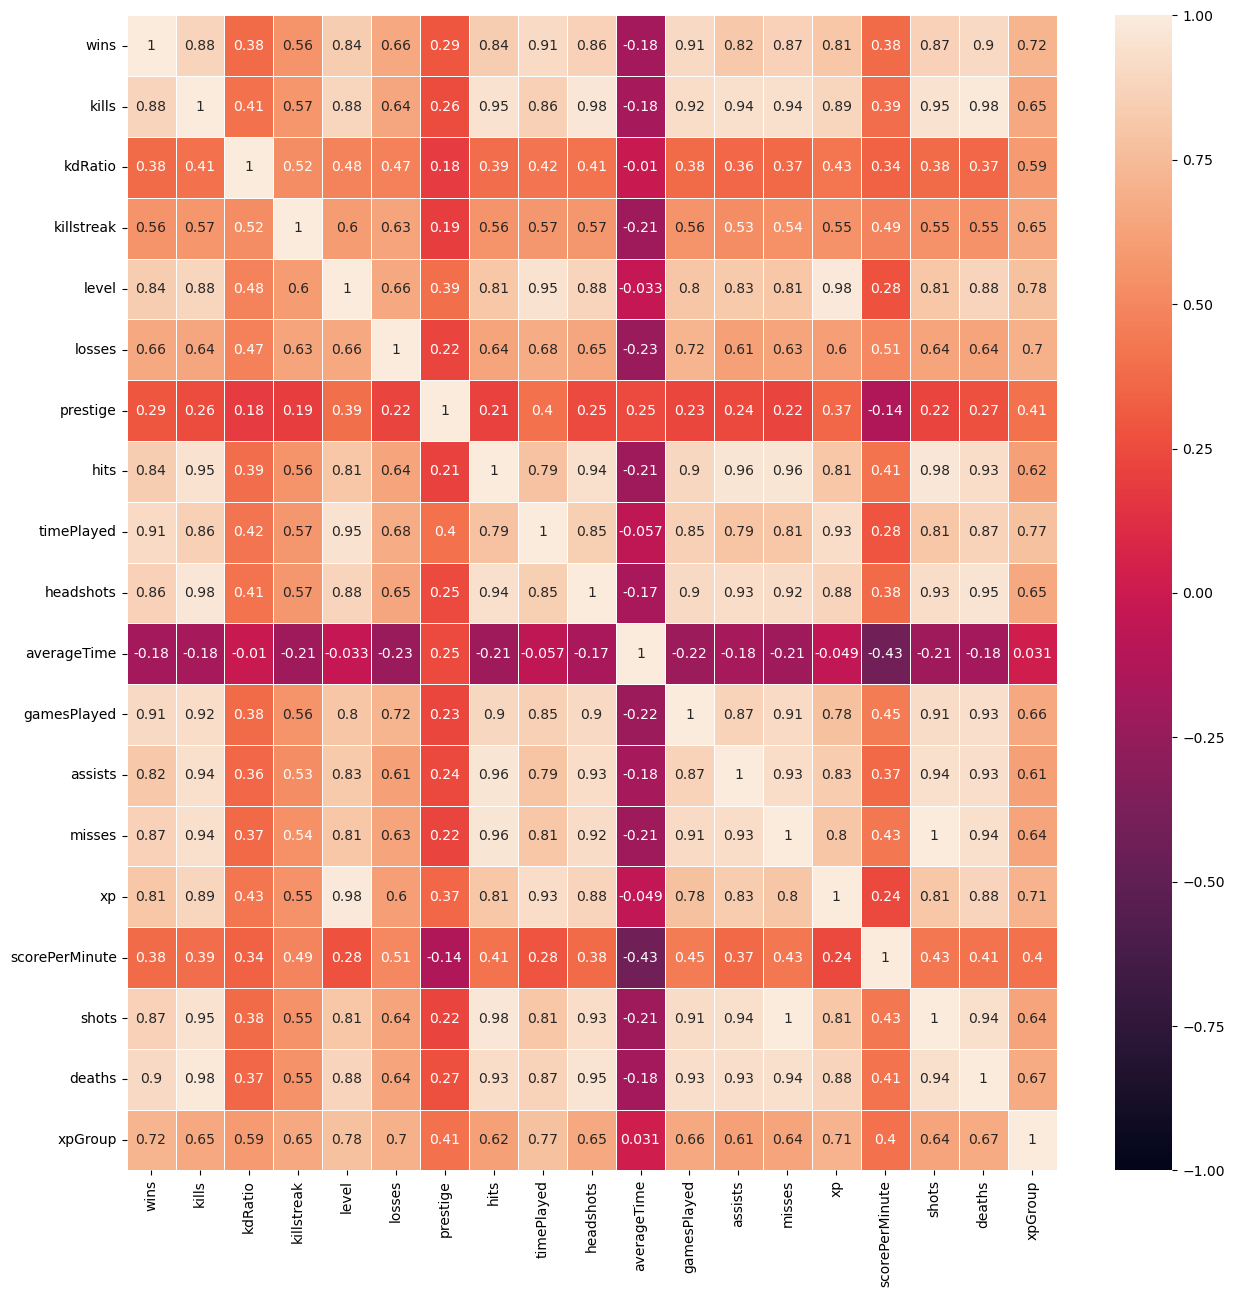

In [31]:
#Heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cod_df.corr(), annot=True, vmin=-1, vmax=1, linewidths=.5, ax=ax)

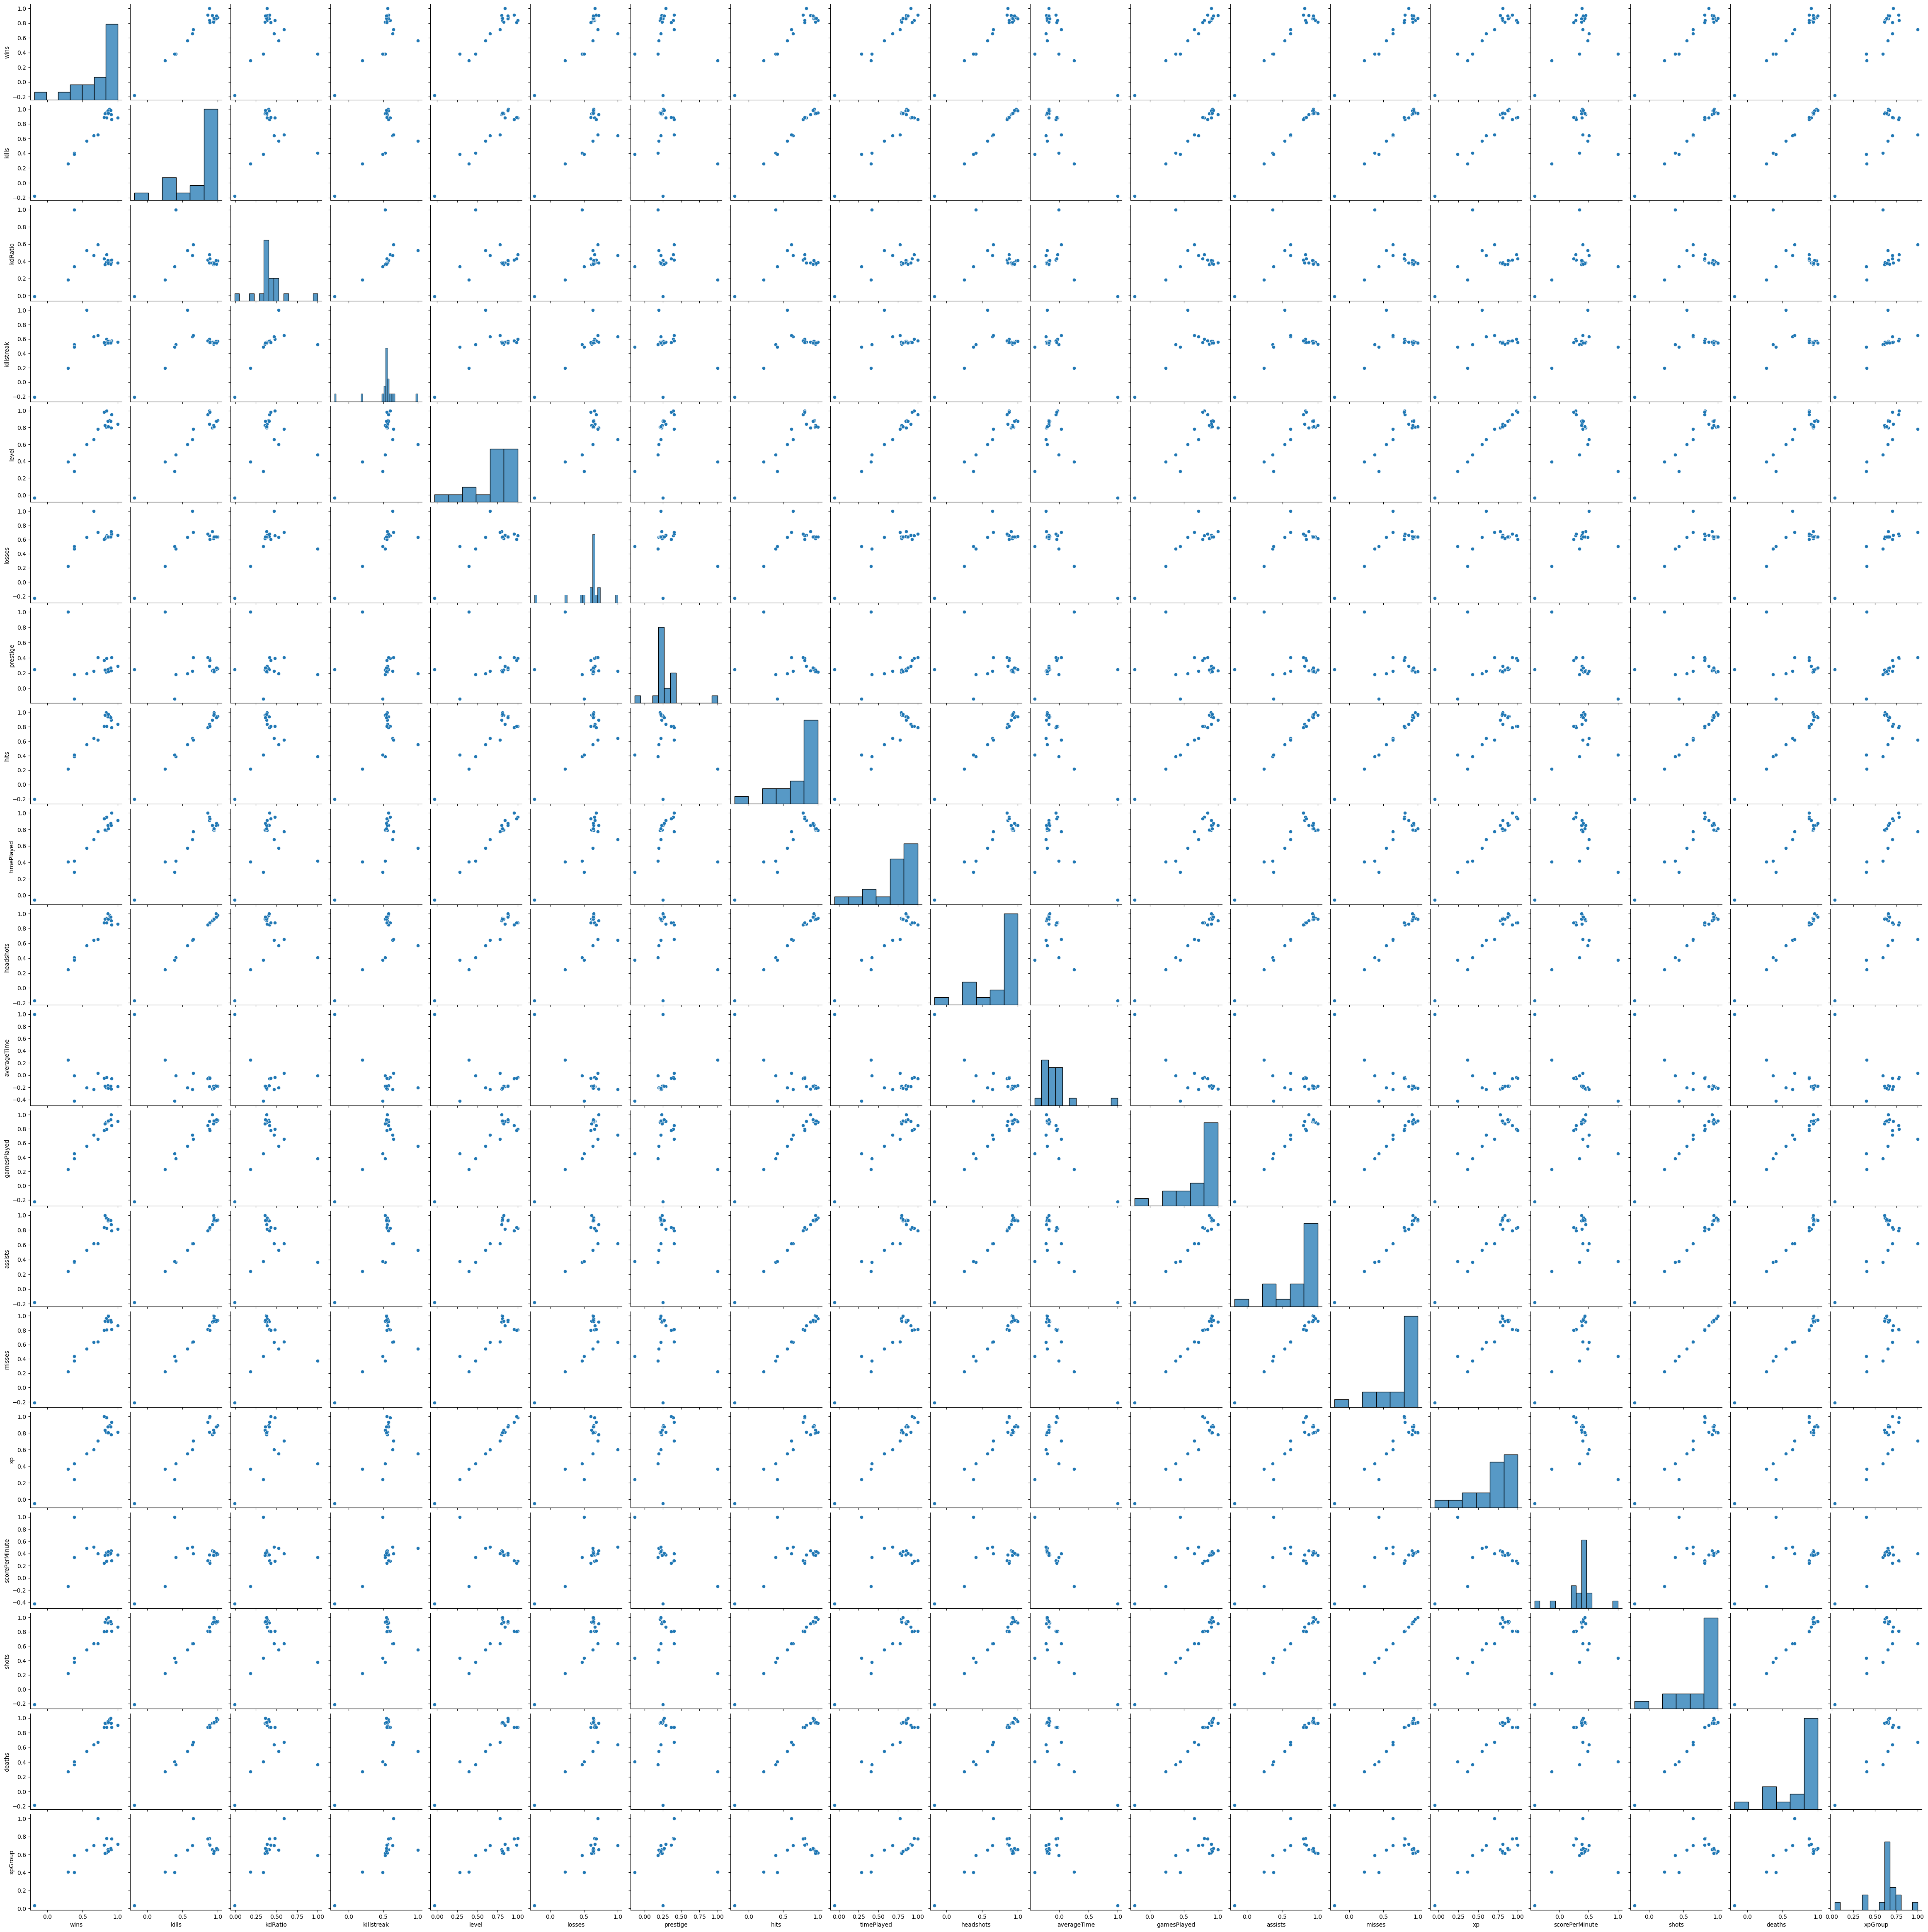

In [32]:
#Pairplot
sns.pairplot(cod_df.corr())

3. Model data

1) Train/Test prediction model for 2 strongest correlated variables 

In [33]:
#scorePerMintute and averageTime had the strongest correlation. Establishing IV and DV to train model.
x=cod_df['scorePerMinute']
y=cod_df['averageTime']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [35]:
#Checking that data was split into train and test
x_train.head()

711     271.388571
643     127.201415
839       0.000000
1423    265.800000
850       0.000000
Name: scorePerMinute, dtype: float64

In [36]:
y_train.head()

711      2.500000
643      5.234568
839     44.000000
1423     1.000000
850     33.000000
Name: averageTime, dtype: float64

In [37]:
# Building model.
import statsmodels.api as sm

#Adding constant to get intercept
x_train_sm = sm.add_constant(x_train)

#Fitting regression line using 'OLS' regression function
lr = sm.OLS(y_train, x_train_sm).fit()

#Printing parameters
lr.params

const             24.532720
scorePerMinute    -0.087534
dtype: float64

In [38]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

# Residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(x_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Making predictions using the testing set
y_train_pred = regr.predict(x_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_train_pred))

Coefficients: 
 [-0.08753362]
Mean squared error: 352.30
Coefficient of determination: 0.15


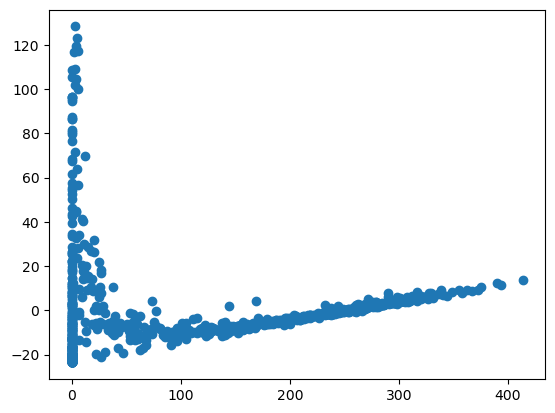

In [39]:
#Ploting data
plt.scatter(x_train, res)
plt.show()

In [40]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variable
X = sm.add_constant(cod_df['scorePerMinute'])

# Fit the linear regression model
model = sm.OLS(cod_df['averageTime'], X).fit()

# Get the summary of the regression results
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     258.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           9.16e-53
Time:                        18:40:54   Log-Likelihood:                -5242.9
No. Observations:                1173   AIC:                         1.049e+04
Df Residuals:                    1171   BIC:                         1.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.2845      0.897     25.

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_99498/1645696319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


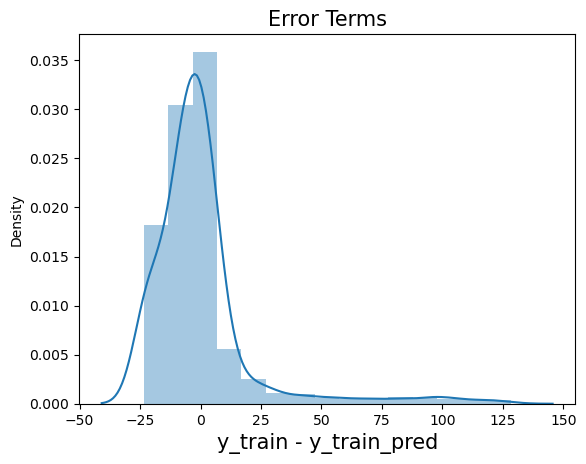

In [41]:
#Plotting error terms
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

2) Classification: Random Forest, KNearest Neighbor, ada boost, gradient boost

Random Forest: 
<BR><Br>*OF NOTE: It may be intuitivly inappropraite to use IVs to predict DV that are co-occurring (i.e., the variables of gameplay may not "predict" time played at a later date as data collection is co-ocurring at the same point in time)

In [42]:
# One-hot encode the data using pandas get_dummies - decided not to use this time since order of xp does matter
# features = pd.get_dummies(features)
# # Display the first 5 rows of the last 12 columns
# features.iloc[:,5:].head(5)

In [43]:
cod_df.columns

Index(['wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige',
       'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed',
       'assists', 'misses', 'xp', 'scorePerMinute', 'shots', 'deaths',
       'xpGroup'],
      dtype='object')

In [44]:
cod_df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,xpGroup
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1.173000e+03,1173.000000,1173.000000,1173.000000,1173.00000
mean,101.257460,2403.724638,0.705775,6.994885,32.024723,4.757033,47.647059,7039.444160,259.913896,415.534527,12.808699,77.879795,450.681159,30603.734015,4.848518e+05,125.906153,37643.178176,2518.168798,1.88491
std,163.134977,4509.040197,0.380526,8.320683,43.347082,5.865657,51.110667,13852.247049,384.023048,778.538377,23.358939,141.922370,888.136386,57802.858748,8.312847e+05,119.444164,71234.131267,4496.712008,0.83209
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.00000
25%,0.000000,15.000000,0.432432,0.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.257669,0.000000,1.000000,0.000000,7.325000e+03,0.000000,0.000000,36.000000,1.00000
50%,15.000000,232.000000,0.766694,6.000000,12.000000,3.000000,15.000000,464.000000,55.000000,40.000000,3.647773,7.000000,45.000000,2523.000000,7.259100e+04,106.200000,2955.000000,305.000000,2.00000
75%,136.000000,2760.000000,0.960281,12.000000,42.000000,8.000000,110.000000,7436.000000,375.000000,489.000000,11.000000,88.000000,488.000000,34340.000000,5.855050e+05,240.271215,41527.000000,3043.000000,3.00000
max,862.000000,30820.000000,3.000000,179.000000,201.000000,50.000000,117.000000,103659.000000,1566.000000,5557.000000,163.000000,934.000000,7917.000000,409916.000000,4.941412e+06,413.800000,498030.000000,30797.000000,3.00000


In [72]:
#Dropping columns I do not want in analysis
#IVS: ['wins', 'kills', 'losses', 'timePlayed', 'scorePerminute', 'deaths', 'kdRatio']
#DV: ['xpGroup']
cod_df_rf = cod_df.drop (['xp','killstreak','level','prestige','hits','headshots','averageTime','gamesPlayed','assists','misses','shots'], axis=1)
cod_df_rf.columns

Index(['wins', 'kills', 'kdRatio', 'losses', 'timePlayed', 'scorePerMinute',
       'deaths', 'xpGroup'],
      dtype='object')

In [73]:
#Convert data to arrays
# Labels are the values we want to predict
labels = np.array(cod_df_rf['xpGroup'])
# Remove the labels from the features
cod_df_rf = cod_df_rf.drop('xpGroup', axis = 1)
# Saving feature names for later use
iv_list = list(cod_df_rf.columns)
# Convert to numpy array
cod_df_rf = np.array(cod_df_rf)

In [74]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(cod_df_rf, labels, test_size = 0.25, random_state = 42)

In [75]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (879, 7)
Training Labels Shape: (879,)
Testing Features Shape: (294, 7)
Testing Labels Shape: (294,)


In [76]:
# The baseline predictions using time played
baseline_preds = test_features[:, iv_list.index('timePlayed')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  257.86


In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Printing out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.08 degrees.


In [79]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.04 %.


In [80]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(cod_df_rf, round(importance, 2)) for cod_df_rf, importance in zip(iv_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: timePlayed           Importance: 0.87
Variable: kills                Importance: 0.08
Variable: kdRatio              Importance: 0.02
Variable: deaths               Importance: 0.02
Variable: wins                 Importance: 0.01
Variable: scorePerMinute       Importance: 0.01
Variable: losses               Importance: 0.0


In [81]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [iv_list.index('timePlayed'), iv_list.index('wins')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.13 degrees.
Accuracy: 95.04 %.


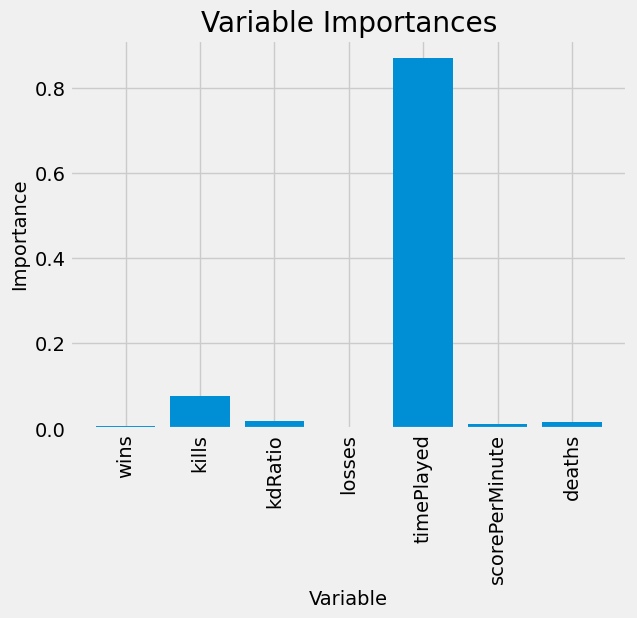

In [82]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, iv_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [83]:
#Trying a different way to do random forest - maybe will deal with zeros in xp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib

In [84]:
#Splitting the data into independent and dependent variables
x=cod_df['timePlayed']
y=cod_df['xpGroup']

In [85]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [86]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [88]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['timePlayed'], colnames=['XP Group']))

XP Group     1   2   3
timePlayed            
1           86  15  15
2           34  28  26
3           22  29  39


In [89]:
print(list(zip(cod_df.columns[:], classifier.feature_importances_)))
joblib.dump(classifier, 'randomforestmodel.pkl')

[('wins', 0.0), ('kills', 1.0)]


['randomforestmodel.pkl']

3) ANOVA (or non-parametric) - Test differences between experince level groups on time played, wins (reinforcers), and losses (punishers)

Running ANOVA with R Studio
OUTPUT --> [LINK]

In [ ]:
#Non-Parametric given skew looking at just timePlayed differences between xpGroup
# result = kruskal.test(timePlayed ~ xpGroup, data = cod_clean2)
# print(result)

In [ ]:
#MANOVA of all predictor variables differences between xpGroup 
# res.man <- manova(cbind(timePlayed, wins, losses, kdRatio) ~ xpGroup, data = cod_clean2)
# summary(res.man)

In [ ]:
# summary.aov(res.man)